<a href="https://colab.research.google.com/github/linndemberg1/Computer-vision/blob/main/Trab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Verificar o erro das câmeras:

In [11]:
#A) Calcular a média, o desvio padrão e a variância, para 20 amostras, 3 bandas (RGB) e média das 3;

import cv2
import numpy as np
import glob

# Função para determinar a média, desvio padrão e variância de uma imagem
def calcular_estatisticas(imagem):
    imagem_float = np.float32(imagem)  # Converte a imagem para float32 para precisão nos cálculos
    media = np.mean(imagem_float, axis=(0, 1))  # Calcula a média para cada canal (R, G, B)
    desvio_padrao = np.std(imagem_float, axis=(0, 1))  # Calcula o desvio padrão para cada canal (R, G, B)
    variancia = np.var(imagem_float, axis=(0, 1))  # Calcula a variância para cada canal (R, G, B)
    return media, desvio_padrao, variancia

# Caminho das imagens
caminho_imagens = glob.glob('/content/zed/figs/*.png')[:20]  # Obtém os caminhos das 20 primeiras imagens PNG na pasta especificada

# Listas para armazenar as estatísticas
medias, desvios_padrao, variancias = [], [], []

# Processamento das imagens
for caminho in caminho_imagens:
    imagem = cv2.imread(caminho)  # Lê a imagem usando OpenCV
    if imagem is not None:
        # Calcula a média, desvio padrão e variância da imagem
        media, desvio_padrao, variancia = calcular_estatisticas(imagem)
        # Armazena os resultados nas listas correspondentes
        medias.append(media)
        desvios_padrao.append(desvio_padrao)
        variancias.append(variancia)

# Convertendo as listas para arrays numpy
medias = np.array(medias)  # Converte a lista de médias em um array numpy
desvios_padrao = np.array(desvios_padrao)  # Converte a lista de desvios padrão em um array numpy
variancias = np.array(variancias)  # Converte a lista de variâncias em um array numpy

# Determinando a média das médias, desvios padrão e variâncias
media_total = np.mean(medias, axis=0)  # Calcula a média das médias de todas as imagens para cada canal (R, G, B)
desvio_padrao_total = np.mean(desvios_padrao, axis=0)  # Calcula a média dos desvios padrão de todas as imagens
variancia_total = np.mean(variancias, axis=0)  # Calcula a média das variâncias de todas as imagens

# Resultados
print("Média das 3 bandas RGB:")
print(media_total)  # Imprime a média total das médias para os canais R, G e B

print("\nDesvio padrão das 3 bandas RGB:")
print(desvio_padrao_total)  # Imprime a média total dos desvios padrão para os canais R, G e B

print("\nVariância das 3 bandas RGB:")
print(variancia_total)  # Imprime a média total das variâncias para os canais R, G e B

Média das 3 bandas RGB:
[35.329136 33.55749  40.697838]

Desvio padrão das 3 bandas RGB:
[20.785847 22.14779  17.213932]

Variância das 3 bandas RGB:
[459.05524 519.7279  333.67688]


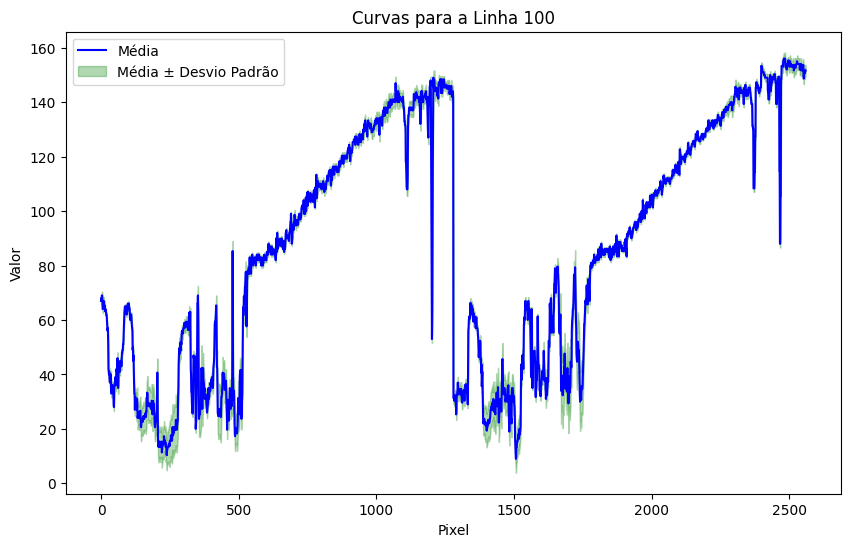

In [12]:
#B) b) Escolher uma determinada linha da imagem e plotar um gráfico mostrando,
# para cada pixel dessa linha, duas curvas: média mais desvio padrão;
# média menos desvio padrão (também 3 bandas e média das 3).

import matplotlib.pyplot as plt  # Importa a biblioteca para criação de gráficos
import numpy as np  # Importa a biblioteca para operações matemáticas e manipulação de arrays
from PIL import Image  # Importa a biblioteca para manipulação de imagens

# Função para plotar as curvas de média ± desvio padrão para uma linha específica de uma imagem
def plot_pixel_line(image_path, line_number):
    # Carregar a imagem
    image = Image.open(image_path)  # Abre a imagem usando PIL
    width, height = image.size  # Obtém a largura e altura da imagem

    # Verificar se o número da linha está dentro dos limites
    if line_number >= height:
        print("O número da linha está fora dos limites da imagem.")  # Verifica se a linha solicitada está dentro da altura da imagem
        return

    # Converter a imagem para um array NumPy
    image_array = np.array(image)  # Converte a imagem em um array NumPy para fácil manipulação

    # Obter a linha específica da imagem
    pixel_line = image_array[line_number, :, :]  # Seleciona a linha desejada da imagem (todos os pixels dessa linha)

    # Calcular a média e o desvio padrão de cada pixel na linha
    mean_line = np.mean(pixel_line, axis=1)  # Calcula a média dos valores RGB para cada pixel na linha
    std_line = np.std(pixel_line, axis=1)  # Calcula o desvio padrão dos valores RGB para cada pixel na linha

    # Calcular as curvas de média + desvio padrão e média - desvio padrão
    upper_curve = mean_line + std_line  # Calcula a curva superior (média + desvio padrão)
    lower_curve = mean_line - std_line  # Calcula a curva inferior (média - desvio padrão)

    # Plotar os resultados
    plt.figure(figsize=(10, 6))  # Define o tamanho do gráfico
    plt.plot(mean_line, label='Média', color='blue')  # Plota a curva da média
    plt.fill_between(range(width), lower_curve, upper_curve, alpha=0.3, color='green', label='Média ± Desvio Padrão')  # Preenche a área entre média - desvio padrão e média + desvio padrão
    plt.xlabel('Pixel')  # Define o rótulo do eixo X
    plt.ylabel('Valor')  # Define o rótulo do eixo Y
    plt.title(f'Curvas para a Linha {line_number}')  # Define o título do gráfico
    plt.legend()  # Adiciona a legenda ao gráfico
    plt.show()  # Exibe o gráfico

# Caminho da imagem PNG
image_path = '/content/zed/Explorer_HD720_SN3299_12-55-01.png'  # Define o caminho para a imagem que será utilizada

# Número da linha que deseja plotar
line_number = 100  # Define o número da linha que será analisada

# Chama a função para plotar as curvas da linha especificada
plot_pixel_line(image_path, line_number)


Nome do arquivo: zed14.png
Resolução: 1280 x 720
Modo de cor: RGBA
Nível mínimo de cinza para cada canal:
Canal R: 10
Canal G: 0
Canal B: 3
Canal A: 255
Nível máximo de cinza para cada canal:
Canal R: 103
Canal G: 81
Canal B: 85
Canal A: 255
Taxa de amostragem máxima da câmera: (96.012, 96.012)
-----------------------------


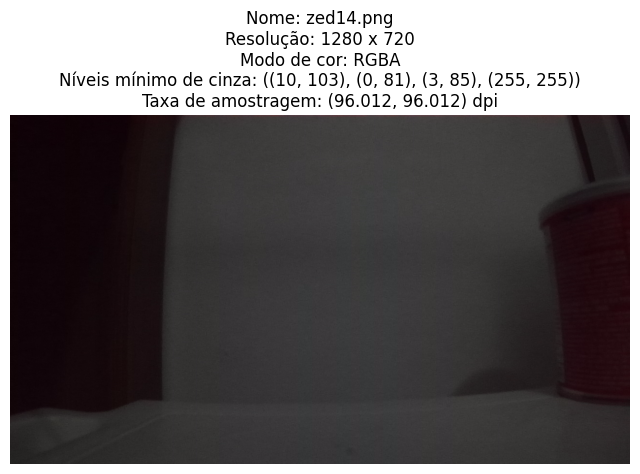

Nome do arquivo: zed12.png
Resolução: 1280 x 720
Modo de cor: RGBA
Nível mínimo de cinza para cada canal:
Canal R: 9
Canal G: 0
Canal B: 0
Canal A: 255
Nível máximo de cinza para cada canal:
Canal R: 96
Canal G: 75
Canal B: 82
Canal A: 255
Taxa de amostragem máxima da câmera: (96.012, 96.012)
-----------------------------


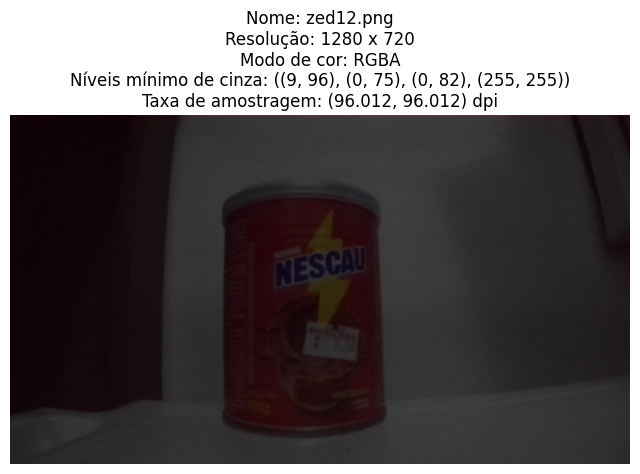

Nome do arquivo: zed11.png
Resolução: 1280 x 720
Modo de cor: RGBA
Nível mínimo de cinza para cada canal:
Canal R: 10
Canal G: 0
Canal B: 0
Canal A: 255
Nível máximo de cinza para cada canal:
Canal R: 99
Canal G: 79
Canal B: 85
Canal A: 255
Taxa de amostragem máxima da câmera: (96.012, 96.012)
-----------------------------


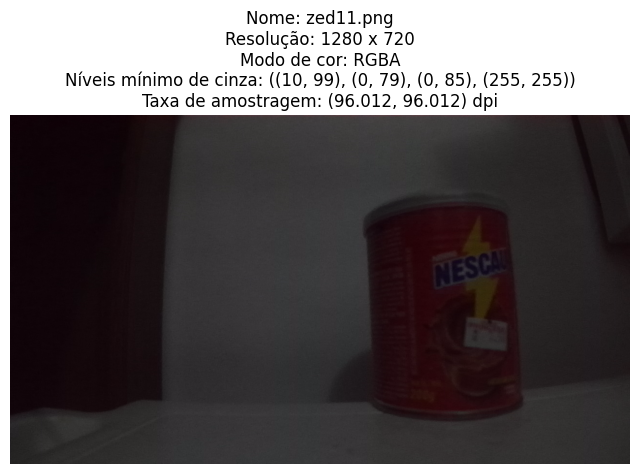

Nome do arquivo: zed7.png
Resolução: 1280 x 720
Modo de cor: RGBA
Nível mínimo de cinza para cada canal:
Canal R: 6
Canal G: 0
Canal B: 2
Canal A: 255
Nível máximo de cinza para cada canal:
Canal R: 122
Canal G: 89
Canal B: 92
Canal A: 255
Taxa de amostragem máxima da câmera: (96.012, 96.012)
-----------------------------


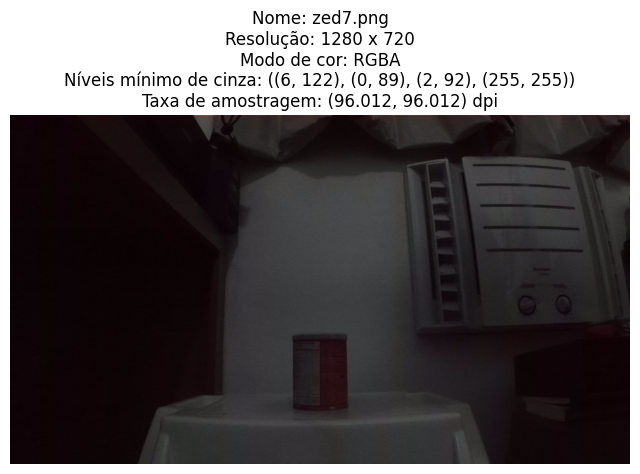

Nome do arquivo: zed1.png
Resolução: 672 x 376
Modo de cor: RGBA
Nível mínimo de cinza para cada canal:
Canal R: 10
Canal G: 4
Canal B: 8
Canal A: 255
Nível máximo de cinza para cada canal:
Canal R: 254
Canal G: 253
Canal B: 251
Canal A: 255
Taxa de amostragem máxima da câmera: (96.012, 96.012)
-----------------------------


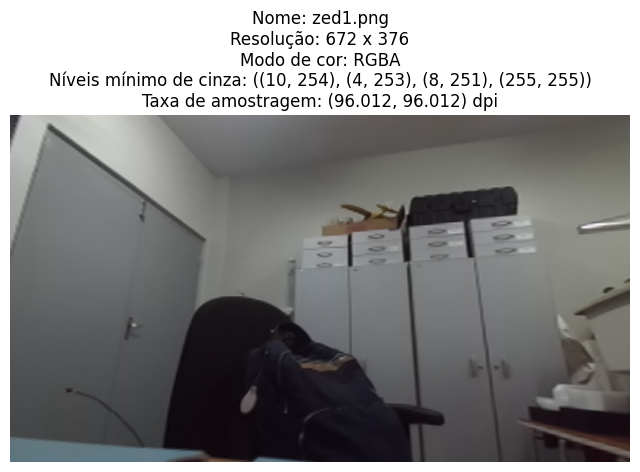

In [13]:
#C) Indique outros dados da imagem (nível de cinza mínimo para cada cor,
# nível máximo para cada cor, mostre 5 imagens das 20 adquiridas,
# taxa de amostragem máxima da câmera, resolução, etc).

from PIL import Image  # Importa a biblioteca para manipulação de imagens
import os  # Importa a biblioteca para operações com o sistema de arquivos
import random  # Importa a biblioteca para operações aleatórias
import matplotlib.pyplot as plt  # Importa a biblioteca para criação de gráficos e visualização

# Definindo o caminho da pasta que contém as imagens e o número de imagens a serem analisadas
caminho_pasta = '/content/zed/figs'  # Caminho da pasta onde as imagens estão armazenadas
numero_de_imagens = 5  # Número de imagens que serão selecionadas aleatoriamente para análise

# Função para analisar imagens PNG aleatórias em uma pasta
def analisar_imagens_aleatorias(pasta, num_imagens):
    arquivos = os.listdir(pasta)  # Lista todos os arquivos na pasta

    # Filtra os arquivos para selecionar apenas os que terminam com ".png"
    arquivos_png = [arquivo for arquivo in arquivos if arquivo.endswith(".png")]

    # Seleciona um número aleatório de arquivos PNG
    imagens_aleatorias = random.sample(arquivos_png, num_imagens)

    # Itera sobre cada arquivo de imagem selecionado aleatoriamente
    for arquivo in imagens_aleatorias:
        imagem = Image.open(os.path.join(pasta, arquivo))  # Abre a imagem usando PIL

        # Obter informações sobre a imagem
        largura, altura = imagem.size  # Obtém a largura e altura da imagem
        modo = imagem.mode  # Obtém o modo de cor da imagem (ex: RGB, L)
        extrema = imagem.getextrema()  # Obtém os valores mínimos e máximos de cinza para cada canal de cor

        # Exibe as informações da imagem no console
        print("Nome do arquivo:", arquivo)
        print("Resolução:", largura, "x", altura)
        print("Modo de cor:", modo)
        print("Nível mínimo de cinza para cada canal:")
        for i, cor in enumerate(modo):
            print(f"Canal {cor}: {extrema[i][0]}")  # Imprime o valor mínimo de cinza para cada canal
        print("Nível máximo de cinza para cada canal:")
        for i, cor in enumerate(modo):
            print(f"Canal {cor}: {extrema[i][1]}")  # Imprime o valor máximo de cinza para cada canal
        print("Taxa de amostragem máxima da câmera:", imagem.info.get("dpi"))  # Imprime a taxa de amostragem da câmera (se disponível)
        print("-----------------------------")

        # Exibe a imagem com suas informações em um gráfico
        plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
        plt.imshow(imagem)  # Exibe a imagem
        plt.title(f"Nome: {arquivo}\nResolução: {largura} x {altura}\nModo de cor: {modo}\n"
                  f"Níveis mínimo de cinza: {extrema}\nTaxa de amostragem: {imagem.info.get('dpi')} dpi")
        plt.axis('off')  # Remove os eixos do gráfico
        plt.show()  # Exibe o gráfico

        imagem.close()  # Fecha o arquivo de imagem para liberar recursos

# Chama a função para analisar e exibir as imagens aleatórias
analisar_imagens_aleatorias(caminho_pasta, numero_de_imagens)